In [1]:
import pandas as pd
import numpy as np
import os
import datetime

In [ ]:
import pandas as pd
import numpy as np
import cudf
import dask
import dask_cudf

In [ ]:
os.getcwd()


'/home/yes24/capstone/추천알고리즘/preprocessed'

## 신구선호도

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [10]:
os.chdir('/content/drive/MyDrive/sora/python/YES24/!code')

In [2]:
pro = pd.read_csv('pro_preprocessed_0623.csv')

In [ ]:
pro['published_at'][0][0:4]

'1954'

In [3]:
pro['pub_newold'] = pro['published_at'].apply(lambda x: 1 if x[0:4] == '2020' else 0)

In [4]:
pro = pro.drop(columns=pro.columns[0])

In [5]:
pro

,index,product_id,product_name,category_id,published_at,shop_price,maker_name,pub_newold
0,335076,3105289,잠언과 영적 권고,7.0,1954-10-20,4000.0,가톨릭출판사,0
1,1136875,117972,한국만주관계사의 연구,9.0,1954-10-31,4000.0,을유문화사,0
2,1134782,115797,교주 춘향전 : 개정판,5.0,1957-10-31,3000.0,을유문화사,0
3,1139963,122607,말틴 루터 생애와 사상,7.0,1960-04-30,5000.0,컨콜디아사,0
4,1140065,122710,말틴루터 소교리문답서 해설,7.0,1960-04-30,5500.0,컨콜디아사,0
...,...,...,...,...,...,...,...,...
1724599,495262,61513793,드론촬영 편집실무,2.0,2020-06-10,25000.0,크라운출판사,1
1724600,61511,90328005,MBA English Basics,11.0,2020-06-10,17800.0,한올출판사,1
1724601,65298,90445341,넷플릭스의 클라우드 엔지니어링,2.0,2020-06-10,25000.0,예문사,1
1724602,62978,90375387,빌 브라이슨의 틀리기 쉬운 영어,11.0,2020-06-10,15000.0,문학동네,1


In [6]:
order = pd.read_csv('orders_preprocessed_0623.csv')

In [7]:
order.drop(columns= order.columns[0],inplace=True)

In [8]:
order

,order_id,account_id,product_id,price,created_at
0,222100083,101307,164108,9000.0,2020-05-14 11:40:16.380
1,217486577,101307,5193211,12600.0,2020-03-16 13:22:19.646
2,219762355,101307,89846594,11610.0,2020-04-11 22:51:05.034
3,222711844,101307,5822521,8820.0,2020-05-23 14:05:09.360
4,222564324,101307,90247432,13500.0,2020-05-21 00:10:50.980
...,...,...,...,...,...
8382509,223890751,16990255,89317795,19800.0,2020-06-09 19:15:15.294
8382510,223890751,16990255,58081328,12350.0,2020-06-09 19:15:15.294
8382511,223900776,16990928,61779464,12420.0,2020-06-09 22:23:28.474
8382512,223900776,16990928,90266627,13500.0,2020-06-09 22:23:28.474


In [9]:
order['created_at']= order['created_at'].astype('datetime64[ns]')

In [10]:
order['created_at'][0].date()

datetime.date(2020, 5, 14)

In [11]:
d = datetime.date(2020, 4, 30)

In [12]:
order['created_at'][0].date() < d

False

In [13]:
order['train'] = order['created_at'].apply(lambda x: np.nan if x.date() > d else x)

In [14]:
order.dropna(inplace=True)

In [15]:
order

,order_id,account_id,product_id,price,created_at,train
1,217486577,101307,5193211,12600.0,2020-03-16 13:22:19.646,2020-03-16 13:22:19.646
2,219762355,101307,89846594,11610.0,2020-04-11 22:51:05.034,2020-04-11 22:51:05.034
5,217665548,101307,60495586,20700.0,2020-03-17 22:33:25.006,2020-03-17 22:33:25.006
6,218317559,101307,89499323,16200.0,2020-03-24 22:04:33.420,2020-03-24 22:04:33.420
7,219800180,101307,86429868,19800.0,2020-04-12 16:52:26.380,2020-04-12 16:52:26.380
...,...,...,...,...,...,...
8382100,221154200,16828708,11863664,16200.0,2020-04-30 03:28:19.614,2020-04-30 03:28:19.614
8382101,221102738,16829171,36881272,13000.0,2020-04-29 11:14:15.420,2020-04-29 11:14:15.420
8382102,221128418,16831673,3260741,24300.0,2020-04-29 17:36:16.154,2020-04-29 17:36:16.154
8382104,221179296,16835619,58308549,23400.0,2020-04-30 16:23:18.840,2020-04-30 16:23:18.840


In [20]:
order_pre = pd.merge(order, pro, on='product_id',how='left')

In [ ]:
order_pre

,order_id,account_id,product_id,price,created_at,train,index,product_name,category_id,published_at,shop_price,maker_name,pub_newold
0,217486577,101307,5193211,12600.0,2020-03-16 13:22:19.646,2020-03-16 13:22:19.646,833174.0,약사 버블워니가 만드는 천연비누,23.0,2011-06-02,14000.0,중앙북스(books),0.0
1,219762355,101307,89846594,11610.0,2020-04-11 22:51:05.034,2020-04-11 22:51:05.034,677084.0,프리드먼은 왜 헬리콥터로 돈을 뿌리자고 했을까,13.0,2020-04-03,12900.0,미래를소유한사람들,1.0
2,217665548,101307,60495586,20700.0,2020-03-17 22:33:25.006,2020-03-17 22:33:25.006,220399.0,독백의 천연비누 완전정복,23.0,2018-04-23,23000.0,좋은땅,0.0
3,218317559,101307,89499323,16200.0,2020-03-24 22:04:33.420,2020-03-24 22:04:33.420,670893.0,쉼 없이 걸어 촛불을 만났다,9.0,2020-03-11,18000.0,21세기북스,1.0
4,219800180,101307,86429868,19800.0,2020-04-12 16:52:26.380,2020-04-12 16:52:26.380,50365.0,더 위험한 과학책,20.0,2020-01-20,22000.0,시공사,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761147,221154200,16828708,11863664,16200.0,2020-04-30 03:28:19.614,2020-04-30 03:28:19.614,920098.0,XGT 사용자 중심 PLC입문,4.0,2014-01-15,18000.0,일진사,0.0
5761148,221102738,16829171,36881272,13000.0,2020-04-29 11:14:15.420,2020-04-29 11:14:15.420,1507083.0,결혼과 가족생활,4.0,2017-02-28,13000.0,시그마프레스,0.0
5761149,221128418,16831673,3260741,24300.0,2020-04-29 17:36:16.154,2020-04-29 17:36:16.154,353359.0,3030 English 세트,11.0,2008-10-28,27000.0,김영사,0.0
5761150,221179296,16835619,58308549,23400.0,2020-04-30 16:23:18.840,2020-04-30 16:23:18.840,1024793.0,삶을 변화시키는 감사 메모,22.0,2018-02-20,13000.0,마음세상,0.0


In [16]:
order_pre.isnull().sum()

NameError: name 'order_pre' is not defined

In [ ]:
order_pre.dropna(inplace=True)

In [ ]:
order_pre

In [22]:
pref_or = pd.DataFrame(order_pre.groupby('account_id')['pub_newold'].agg('mean'))

In [ ]:
pref_or.reset_index(inplace=True)
pref_or.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [ ]:
pref_or

,account_id,new_preference
0,100001,0.380952
1,100004,0.000000
2,100018,0.000000
3,100020,0.000000
4,100033,0.333333
...,...,...
1383426,16837167,0.000000
1383427,16837191,0.000000
1383428,16837193,1.000000
1383429,16837205,0.000000


In [ ]:
order_pref = pd.merge(order, pref_or, on='account_id',how='left')

In [ ]:
order_pref

,order_id,account_id,product_id,price,created_at,train,new_preference
0,217486577,101307,5193211,12600.0,2020-03-16 13:22:19.646,2020-03-16 13:22:19.646,0.3
1,219762355,101307,89846594,11610.0,2020-04-11 22:51:05.034,2020-04-11 22:51:05.034,0.3
2,217665548,101307,60495586,20700.0,2020-03-17 22:33:25.006,2020-03-17 22:33:25.006,0.3
3,218317559,101307,89499323,16200.0,2020-03-24 22:04:33.420,2020-03-24 22:04:33.420,0.3
4,219800180,101307,86429868,19800.0,2020-04-12 16:52:26.380,2020-04-12 16:52:26.380,0.3
...,...,...,...,...,...,...,...
5761147,221154200,16828708,11863664,16200.0,2020-04-30 03:28:19.614,2020-04-30 03:28:19.614,0.0
5761148,221102738,16829171,36881272,13000.0,2020-04-29 11:14:15.420,2020-04-29 11:14:15.420,0.0
5761149,221128418,16831673,3260741,24300.0,2020-04-29 17:36:16.154,2020-04-29 17:36:16.154,0.0
5761150,221179296,16835619,58308549,23400.0,2020-04-30 16:23:18.840,2020-04-30 16:23:18.840,0.0


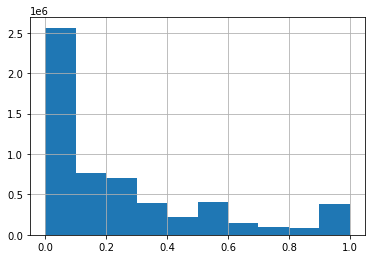

In [ ]:
order_pref['new_preference'].hist()

In [ ]:
order_pref.to_csv('test1.csv')

In [53]:
click = pd.read_csv('click_preprocessed.csv')

In [19]:
click

,Unnamed: 0,request_date_time,account_id,device_type,product_id,before_product_id
0,0,2019-12-17 16:28:21,101773,1,84909620,0
1,1,2019-12-12 14:53:54,101773,1,72252570,80131060
2,2,2020-01-20 10:16:00,101773,1,79648760,0
3,3,2020-05-15 12:51:08,101773,1,84659792,0
4,4,2020-05-01 08:46:22,101773,1,59737522,0
...,...,...,...,...,...,...
60265425,60265425,2020-05-31 15:05:50,16957892,0,11534367,0
60265426,60265426,2020-05-31 15:02:27,16957892,0,85432240,0
60265427,60265427,2020-05-31 15:02:33,16957892,0,85432240,0
60265428,60265428,2020-05-31 15:04:04,16957892,0,4781359,0


In [54]:
click['request_date_time'] = click['request_date_time'].astype('datetime64[ns]')

In [55]:
d = datetime.date(2020, 3, 1)
e = datetime.date(2020, 5, 1)





In [56]:
click.drop(columns=click.columns[0],inplace=True)

In [23]:
click

,request_date_time,account_id,device_type,product_id,before_product_id
0,2019-12-17 16:28:21,101773,1,84909620,0
1,2019-12-12 14:53:54,101773,1,72252570,80131060
2,2020-01-20 10:16:00,101773,1,79648760,0
3,2020-05-15 12:51:08,101773,1,84659792,0
4,2020-05-01 08:46:22,101773,1,59737522,0
...,...,...,...,...,...
60265425,2020-05-31 15:05:50,16957892,0,11534367,0
60265426,2020-05-31 15:02:27,16957892,0,85432240,0
60265427,2020-05-31 15:02:33,16957892,0,85432240,0
60265428,2020-05-31 15:04:04,16957892,0,4781359,0


In [57]:
click['train'] = click['request_date_time'].apply(lambda x: np.nan if x.date() < d else x )


In [58]:
click.dropna(inplace=True)

In [26]:
click['train'] = click['request_date_time'].apply(lambda x: np.nan if x.date() < e else x )

In [27]:
click[10:]

,request_date_time,account_id,device_type,product_id,before_product_id,train
41,2020-04-14 17:22:25,102377,0,89873199,0,NaT
44,2020-04-14 17:23:35,102377,0,89341581,0,NaT
55,2020-04-20 21:18:07,102377,0,87037841,0,NaT
59,2020-03-02 22:21:11,103638,0,87606910,0,NaT
60,2020-03-17 22:12:30,103638,0,60755509,0,NaT
...,...,...,...,...,...,...
60265425,2020-05-31 15:05:50,16957892,0,11534367,0,2020-05-31 15:05:50
60265426,2020-05-31 15:02:27,16957892,0,85432240,0,2020-05-31 15:02:27
60265427,2020-05-31 15:02:33,16957892,0,85432240,0,2020-05-31 15:02:33
60265428,2020-05-31 15:04:04,16957892,0,4781359,0,2020-05-31 15:04:04


In [28]:
click.dropna(inplace=True)

In [ ]:
click

In [59]:
click_pre = pd.merge(click, pro, on='product_id',how='left')

In [30]:
click_pre.head()

,request_date_time,account_id,device_type,product_id,before_product_id,train,index,product_name,category_id,published_at,shop_price,maker_name,pub_newold
0,2020-05-15 12:51:08,101773,1,84659792,0,2020-05-15 12:51:08,1718804.0,지적 대화를 위한 넓고 얕은 지식 제로,14.0,2019-12-24,19800.0,웨일북,0.0
1,2020-05-01 08:46:22,101773,1,59737522,0,2020-05-01 08:46:22,1484975.0,유턴후 직진입니다,33.0,2018-04-20,7000.0,다향,0.0
2,2020-05-15 12:57:16,101773,1,86895523,0,2020-05-15 12:57:16,51989.0,날씨가 좋으면 찾아가겠어요,33.0,2020-02-01,13800.0,시공사,1.0
3,2020-05-20 13:40:57,101773,1,81503945,0,2020-05-20 13:40:57,884611.0,"[예스리커버] 1일 1페이지, 세상에서 가장 짧은 교양 수업 365",14.0,2019-10-30,16000.0,위즈덤하우스,0.0
4,2020-05-15 12:49:26,101773,1,81503945,0,2020-05-15 12:49:26,884611.0,"[예스리커버] 1일 1페이지, 세상에서 가장 짧은 교양 수업 365",14.0,2019-10-30,16000.0,위즈덤하우스,0.0


In [ ]:
click_pre.to_csv('click_preprocessed_0_newpreference_may.csv', index=None)

In [60]:
click_pre = pd.read_csv('click_preprocessed_0_newpreference.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'click_preprocessed_0_newpreference.csv'

In [ ]:
click_pre

,request_date_time,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold
0,2020-05-15 12:51:08,101773,1,84659792,0,2020-05-15 12:51:08,지적 대화를 위한 넓고 얕은 지식 제로,14.0,2019-12-24,19800.0,웨일북,0.0
1,2020-05-01 08:46:22,101773,1,59737522,0,2020-05-01 08:46:22,유턴후 직진입니다,33.0,2018-04-20,7000.0,다향,0.0
2,2020-05-15 12:57:16,101773,1,86895523,0,2020-05-15 12:57:16,날씨가 좋으면 찾아가겠어요,33.0,2020-02-01,13800.0,시공사,1.0
3,2020-05-20 13:40:57,101773,1,81503945,0,2020-05-20 13:40:57,"[예스리커버] 1일 1페이지, 세상에서 가장 짧은 교양 수업 365",14.0,2019-10-30,16000.0,위즈덤하우스,0.0
4,2020-05-15 12:49:26,101773,1,81503945,0,2020-05-15 12:49:26,"[예스리커버] 1일 1페이지, 세상에서 가장 짧은 교양 수업 365",14.0,2019-10-30,16000.0,위즈덤하우스,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9351306,2020-05-31 15:05:50,16957892,0,11534367,0,2020-05-31 15:05:50,미리 배우는 초등 한국사 1,27.0,2013-11-30,12500.0,주류성어린이,0.0
9351307,2020-05-31 15:02:27,16957892,0,85432240,0,2020-05-31 15:02:27,초고필 지금 한국사를 해야 할 때 1권 (선사 시대~고려),29.0,2019-12-30,12000.0,동아출판,0.0
9351308,2020-05-31 15:02:33,16957892,0,85432240,0,2020-05-31 15:02:33,초고필 지금 한국사를 해야 할 때 1권 (선사 시대~고려),29.0,2019-12-30,12000.0,동아출판,0.0
9351309,2020-05-31 15:04:04,16957892,0,4781359,0,2020-05-31 15:04:04,초등학교 선생님이 함께 모여 쓴 한국사 이야기 3,27.0,2011-03-01,11000.0,늘푸른아이들,0.0


In [61]:
click_pre.isnull().sum()

request_date_time        0
account_id               0
device_type              0
product_id               0
before_product_id        0
train                    0
index                52894
product_name         52894
category_id          55061
published_at         52894
shop_price           52894
maker_name           52894
pub_newold           52894
dtype: int64

In [62]:
click_pre = click_pre.drop(columns=click_pre.columns[0])

In [63]:
click_pre.dropna(inplace=True)

In [64]:
click_pre.drop(columns='index',inplace=True)

In [65]:
click_pre.sort_values(['train'])

,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold
18182289,10545677,0,82439977,0,2020-03-01 00:00:00,2020 Xistory 자이스토리 고2 수학1,3.0,2019-12-01,15800.0,수경출판사,0.0
16735675,5416528,0,340773,0,2020-03-01 00:00:00,징비록,15.0,2014-11-20,11900.0,서해문집,0.0
4894863,12778604,0,72250469,0,2020-03-01 00:00:00,2019 해커스경찰 최신기출문제집 형법,1.0,2019-05-02,32900.0,해커스경찰,0.0
1057752,142255,0,85927975,0,2020-03-01 00:00:00,EBS 수능특강 사회탐구영역 생활과 윤리 (2020년),3.0,2020-01-13,6000.0,한국교육방송공사,1.0
33171592,1428619,0,74834536,69609421,2020-03-01 00:00:01,NIGHTS BEFORE NIGHT 초회 한정 BOX판,8.0,2019-07-30,14000.0,조은세상,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9374107,6261677,0,85103628,0,2020-05-31 23:56:44,놀면서 배우는 단위와 측정 플레이북,27.0,2019-12-27,12000.0,다락원,0.0
7799845,5215938,1,87512858,0,2020-05-31 23:56:44,2020 이동기 영어 기적의 특강,1.0,2020-02-14,14000.0,에스티유니타스,1.0
11201365,13480370,0,90164277,0,2020-05-31 23:56:45,이윤기의 그리스 로마 신화 (특별 합본판),33.0,2020-05-04,39800.0,웅진지식하우스,1.0
27301593,12050401,0,90088015,0,2020-05-31 23:56:45,대치동 독서법,17.0,2020-05-08,16500.0,일상과이상,1.0


In [66]:
click_pre.to_csv("click_preference_groupbybefore.csv")

In [67]:
pref = pd.DataFrame(click_pre.groupby('account_id')['pub_newold'].agg('mean'))

In [68]:
pref.reset_index(inplace=True)

In [69]:
pref.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [70]:
pref

,account_id,new_preference
0,100001,0.448454
1,100004,0.090909
2,100014,1.000000
3,100018,0.000000
4,100020,0.272727
...,...,...
1548631,16960408,0.000000
1548632,16960413,1.000000
1548633,16960422,1.000000
1548634,16960424,1.000000


In [42]:
pref

,account_id,new_preference
0,100001,0.616667
1,100020,0.375000
2,100037,0.250000
3,100040,1.000000
4,100058,0.281250
...,...,...
854431,16960408,0.000000
854432,16960413,1.000000
854433,16960422,1.000000
854434,16960424,1.000000


In [43]:
click_pre

,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold
0,101773,1,84659792,0,2020-05-15 12:51:08,지적 대화를 위한 넓고 얕은 지식 제로,14.0,2019-12-24,19800.0,웨일북,0.0
1,101773,1,59737522,0,2020-05-01 08:46:22,유턴후 직진입니다,33.0,2018-04-20,7000.0,다향,0.0
2,101773,1,86895523,0,2020-05-15 12:57:16,날씨가 좋으면 찾아가겠어요,33.0,2020-02-01,13800.0,시공사,1.0
3,101773,1,81503945,0,2020-05-20 13:40:57,"[예스리커버] 1일 1페이지, 세상에서 가장 짧은 교양 수업 365",14.0,2019-10-30,16000.0,위즈덤하우스,0.0
4,101773,1,81503945,0,2020-05-15 12:49:26,"[예스리커버] 1일 1페이지, 세상에서 가장 짧은 교양 수업 365",14.0,2019-10-30,16000.0,위즈덤하우스,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9351306,16957892,0,11534367,0,2020-05-31 15:05:50,미리 배우는 초등 한국사 1,27.0,2013-11-30,12500.0,주류성어린이,0.0
9351307,16957892,0,85432240,0,2020-05-31 15:02:27,초고필 지금 한국사를 해야 할 때 1권 (선사 시대~고려),29.0,2019-12-30,12000.0,동아출판,0.0
9351308,16957892,0,85432240,0,2020-05-31 15:02:33,초고필 지금 한국사를 해야 할 때 1권 (선사 시대~고려),29.0,2019-12-30,12000.0,동아출판,0.0
9351309,16957892,0,4781359,0,2020-05-31 15:04:04,초등학교 선생님이 함께 모여 쓴 한국사 이야기 3,27.0,2011-03-01,11000.0,늘푸른아이들,0.0


In [97]:
click_pref = pd.merge(click_pre, pref, on='account_id',how='left')

In [98]:
click_pref

,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold,new_preference
0,101773,1,84659792,0,2020-05-15 12:51:08,지적 대화를 위한 넓고 얕은 지식 제로,14.0,2019-12-24,19800.0,웨일북,0.0,0.285714
1,101773,1,59737522,0,2020-05-01 08:46:22,유턴후 직진입니다,33.0,2018-04-20,7000.0,다향,0.0,0.285714
2,101773,1,86895523,0,2020-05-15 12:57:16,날씨가 좋으면 찾아가겠어요,33.0,2020-02-01,13800.0,시공사,1.0,0.285714
3,101773,1,81503945,0,2020-05-20 13:40:57,"[예스리커버] 1일 1페이지, 세상에서 가장 짧은 교양 수업 365",14.0,2019-10-30,16000.0,위즈덤하우스,0.0,0.285714
4,101773,1,73164325,0,2020-03-09 09:00:20,완자 고등 물리학 2 (2020년용),3.0,2019-05-01,20000.0,비상교육,0.0,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...
35021148,16957892,0,11534367,0,2020-05-31 15:05:50,미리 배우는 초등 한국사 1,27.0,2013-11-30,12500.0,주류성어린이,0.0,0.178571
35021149,16957892,0,85432240,0,2020-05-31 15:02:27,초고필 지금 한국사를 해야 할 때 1권 (선사 시대~고려),29.0,2019-12-30,12000.0,동아출판,0.0,0.178571
35021150,16957892,0,85432240,0,2020-05-31 15:02:33,초고필 지금 한국사를 해야 할 때 1권 (선사 시대~고려),29.0,2019-12-30,12000.0,동아출판,0.0,0.178571
35021151,16957892,0,4781359,0,2020-05-31 15:04:04,초등학교 선생님이 함께 모여 쓴 한국사 이야기 3,27.0,2011-03-01,11000.0,늘푸른아이들,0.0,0.178571


In [99]:
click_pref.isnull().sum()

account_id           0
device_type          0
product_id           0
before_product_id    0
train                0
product_name         0
category_id          0
published_at         0
shop_price           0
maker_name           0
pub_newold           0
new_preference       0
dtype: int64

In [74]:
click_pref.dropna(inplace=True)

In [105]:
click_pref.reset_index(drop=True, inplace=True)

In [108]:
click_pref = click_pref.where(click_pref['train'] < pd.to_datetime('2020-05-01'))

In [109]:
click_pref_fin = click_pref.groupby('account_id').mean()

In [110]:
click_pref_fin.reset_index(inplace=True)

In [111]:
click_pref_fin

,account_id,device_type,product_id,before_product_id,category_id,shop_price,pub_newold,new_preference
0,100001.0,0.0,6.799639e+07,1.347969e+07,14.044776,15270.895522,0.373134,0.448454
1,100004.0,0.0,6.730744e+07,2.427023e+07,4.909091,16318.181818,0.090909,0.090909
2,100014.0,0.0,8.990398e+07,0.000000e+00,13.000000,16000.000000,1.000000,1.000000
3,100018.0,0.0,7.745835e+07,4.264982e+07,2.000000,25444.444444,0.000000,0.000000
4,100020.0,0.0,6.669382e+07,0.000000e+00,22.666667,14200.000000,0.000000,0.272727
...,...,...,...,...,...,...,...,...
1363441,16837205.0,0.0,6.112346e+07,1.301209e+07,5.200000,14300.000000,0.200000,0.142857
1363442,16837207.0,0.0,6.403668e+07,0.000000e+00,3.000000,16933.333333,0.000000,0.000000
1363443,16837210.0,0.0,6.658141e+07,0.000000e+00,4.000000,45000.000000,0.000000,0.000000
1363444,16837213.0,0.0,1.552359e+07,0.000000e+00,11.000000,22000.000000,0.000000,0.000000


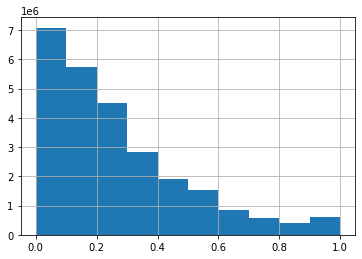

In [ ]:
click_pref['new_preference'].hist()

In [ ]:
order_pref['new_preference'].hist()

In [ ]:
click_pref['new_preference'].describe()

count   26037720.00
mean           0.26
std            0.23
min            0.00
25%            0.09
50%            0.20
75%            0.37
max            1.00
Name: new_preference, dtype: float64

In [96]:
click_pref

,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold,new_preference


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [112]:
order_pref['new_pref'] = order_pref['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

NameError: name 'order_pref' is not defined

In [ ]:
order_pref.drop(columns=order_pref.columns[0], inplace=True)

In [ ]:
order_pref

In [113]:
click_pref_fin.to_csv('click_newpreference.csv',index=None)

In [116]:
click_pref_fin

,account_id,device_type,product_id,before_product_id,category_id,shop_price,pub_newold,new_preference
0,100001.0,0.0,6.799639e+07,1.347969e+07,14.044776,15270.895522,0.373134,0.448454
1,100004.0,0.0,6.730744e+07,2.427023e+07,4.909091,16318.181818,0.090909,0.090909
2,100014.0,0.0,8.990398e+07,0.000000e+00,13.000000,16000.000000,1.000000,1.000000
3,100018.0,0.0,7.745835e+07,4.264982e+07,2.000000,25444.444444,0.000000,0.000000
4,100020.0,0.0,6.669382e+07,0.000000e+00,22.666667,14200.000000,0.000000,0.272727
...,...,...,...,...,...,...,...,...
1363441,16837205.0,0.0,6.112346e+07,1.301209e+07,5.200000,14300.000000,0.200000,0.142857
1363442,16837207.0,0.0,6.403668e+07,0.000000e+00,3.000000,16933.333333,0.000000,0.000000
1363443,16837210.0,0.0,6.658141e+07,0.000000e+00,4.000000,45000.000000,0.000000,0.000000
1363444,16837213.0,0.0,1.552359e+07,0.000000e+00,11.000000,22000.000000,0.000000,0.000000


In [115]:
click_pref_fin = pd.read_csv('click_newpreference.csv')

In [117]:
click_pref_fin['new_pref'] = click_pref_fin['new_preference'].apply(lambda x:1 if x>=0.5 else 0) 

In [118]:
click_pref_fin.to_csv('click_newpreference_onehot.csv', index=False)

## 카테고리선호도(클릭)

In [ ]:
import pandas as pd
import numpy as np
import cudf
import dask
import dask_cudf

In [ ]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

In [ ]:

client.run(cudf.set_allocator, "managed")  # Uses managed memory instead of "default"

In [ ]:
pro = pd.read_csv('pro_preprocessed_0623.csv')

pro

In [ ]:
dummies = pd.get_dummies(pro['category_id'],prefix='category')

In [ ]:
pro_pre = pd.concat([pro, dummies], axis=1)

In [ ]:
pro_pre = cudf.DataFrame.from_pandas(pro_pre)

In [ ]:
pro_pre = dask_cudf.from_cudf(pro_pre,npartitions=12)

In [ ]:
pro_pre

In [ ]:
click = dask_cudf.read_csv('click_preprocessed.csv')
click

In [ ]:
df_1 = dask_cudf.from_cudf(click,npartitions=3)
#df_1 = df_1.map_partitions(lambda df: df.query('a>1'))
df_2 = dask_cudf.from_cudf(pro_pre,npartitions=3)
#df_2 = df_2.map_partitions(lambda df: df.query('a>1'))

In [ ]:
help(df_1.divisions)

In [ ]:
df_1

In [ ]:
df_2

In [ ]:
click.join(pro_pre,how='left').compute()

In [ ]:
click_pre = cudf.(click, pro_pre, on='product_id', how='left')

In [ ]:
click = cudf.read_csv('maker_dummies.csv')

In [ ]:
help(click)